# Problem Set 7

## Problem 1

In [695]:
import math
import numpy as np
import kplr
from scipy import integrate
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Find the target KOI.
client = kplr.API()
koi = client.koi(97.01)

# Get a list of light curve datasets.
lcs = koi.get_light_curves(short_cadence=False)

# Open the first dataset and read it
f = lcs[0].open()
hdu_data = f[1].data

time = hdu_data["time"] # get the time of each observation
flux = hdu_data["sap_flux"] # get the flux
flux_err = hdu_data["sap_flux_err"] # get the uncertainty of the flux

f.close()




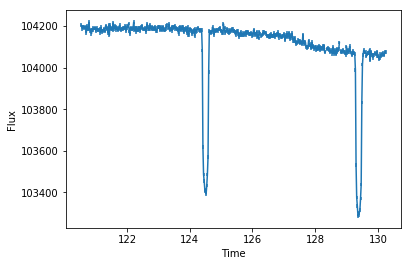

In [696]:
plt.xlabel("Time") #label plot chart
plt.ylabel("Flux")
plt.errorbar(time, flux, yerr=flux_err)
plt.show()

In [697]:

#Selecting the index range for the data
index = np.where((time>124) & (time<125))
#flux_eclipse = flux[index]
index

(array([170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
        183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
        196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208,
        209, 210, 211, 212, 213, 214, 215, 216, 217, 218]),)

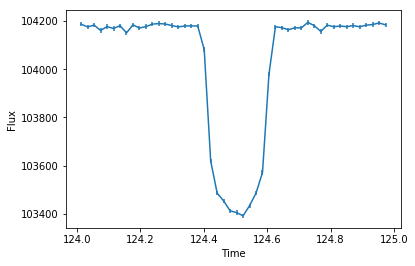

In [698]:
#Selecting the index range for the data

plt.errorbar(time[170:218], flux[170:218], yerr=flux_err[170:218])
f_obs_raw = flux[170:218]
f_err = flux_err[170:218]
np.asarray(f_err)

plt.xlabel("Time")
plt.ylabel("Flux")
plt.show()

In [699]:
f_err

array([ 8.9091053 ,  8.90872955,  8.90889359,  8.90834904,  8.90874672,
        8.9085331 ,  8.90879154,  8.90779781,  8.90901852,  8.908494  ,
        8.90876293,  8.90905571,  8.90921307,  8.9091711 ,  8.90890026,
        8.90835953,  8.90818024,  8.90819645,  8.90883255,  8.90548801,
        8.88861656,  8.88407803,  8.88298607,  8.88153076,  8.88129139,
        8.8807888 ,  8.88218403,  8.88407326,  8.88713074,  8.90126324,
        8.90837669,  8.9082098 ,  8.90806866,  8.90860462,  8.90793037,
        8.90939331,  8.90822124,  8.9078207 ,  8.90839672,  8.90892124,
        8.90851784,  8.90848923,  8.90825176,  8.90833187,  8.90855789,
        8.9083252 ,  8.90934181,  8.90827942], dtype=float32)

In [700]:
#1st Calculation Flux
np.average(flux[170:218])
tflux_avg = np.average(flux[170:218])
tflux_avg

104039.78

In [701]:
np.std(flux[170:218])
tflux_std = np.std(flux[170:218])
tflux_std

275.65317

In [702]:
flux_focus_list1=[]
flux_r = flux[170:218]
for i in range(len(flux_r)):
    abs_focus = (np.absolute((flux_r[i]-tflux_avg))/tflux_std)
    if abs_focus <= 2:
        flux_focus_list1.append(flux_r[i])
        
len(flux_focus_list1)

41

In [703]:
#1st Calculation FluxErr
np.average(flux_err[170:218])
tflux_err_avg = np.average(flux_err[170:218])
tflux_err_avg

8.9036789

In [704]:
np.std(flux_err[170:218])
tflux_err_std = np.std(flux_err[170:218])
tflux_err_std

0.0097643109

In [705]:
flux_err_focus_list1=[]
flux_err_r = flux_err[170:218]
for i in range(len(flux_err_r)):
    abs_err_focus = (np.absolute((flux_err_r[i]-tflux_err_avg))/tflux_err_std)
    if abs_err_focus <= 2:
        flux_err_focus_list1.append(flux_err_r[i])
        
len(flux_err_focus_list1)
#np.asarray(flux_err_focus_list1)

41

In [706]:
#2nd Calculation Flux
np.average(flux_focus_list1)
tflux_avg2 = np.average(flux_focus_list1)
tflux_avg2

104142.38

In [707]:
np.std(flux_focus_list1)
tflux_std2 = np.std(flux_focus_list1)
tflux_std2

128.72253

In [708]:
flux_focus_list2=[]
flux_r_2 = flux_focus_list1
for i in range(len(flux_r_2)):
    abs_focus2 = (np.absolute((flux_r_2[i]-tflux_avg2))/tflux_std2)
    if abs_focus2 <= 2:
        flux_focus_list2.append(flux_r_2[i])
        
len(flux_focus_list2)

39

In [709]:
#2nd Calculation FluxErr
np.average(flux_err_focus_list1)
tflux_err_avg2 = np.average(flux_err_focus_list1)
tflux_err_avg2

8.9073086

In [710]:
#flux_err_focus_list2=[]
#flux_err_r_2 = flux_err_focus_list1
#for i in range(len(flux_err_r_2)):
#    abs_err_focus2 = (np.absolute((flux_err_r_2[i]-tflux_err_avg2))/tflux_err_std)
#    if abs_err_focus2 <= 2:
#        flux_err_focus_list2.append(abs_focus2)
        
#len(flux_err_focus_list2)
#np.asarray(flux_err_focus_list2)

In [711]:
#3rd Calculation Flux
np.average(flux_focus_list2)
tflux_avg3 = np.average(flux_focus_list2)
tflux_avg3

104170.43

In [712]:
np.std(flux_focus_list2)
tflux_std3 = np.std(flux_focus_list2)
tflux_std3

35.553974

In [713]:
flux_focus_list3=[]
flux_r_3 = flux_focus_list2
for i in range(len(flux_r_3)):
    abs_focus3 = (np.absolute((flux_r_3[i]-tflux_avg3))/tflux_std3)
    if abs_focus3 <= 2:
        flux_focus_list3.append(flux_r_3[i])
        
len(flux_focus_list3)

37

In [714]:
#4th Flux
np.average(flux_focus_list3)
tflux_avg4 = np.average(flux_focus_list3)
tflux_avg4

104177.97

In [715]:
np.std(flux_focus_list3)
tflux_std4 = np.std(flux_focus_list3)
tflux_std4

9.0318079

In [716]:
flux_focus_list4=[]
flux_r_4 = flux_focus_list3
for i in range(len(flux_r_4)):
    abs_focus4 = (np.absolute((flux_r_4[i]-tflux_avg4))/tflux_std4)
    if abs_focus4 <= 2:
        flux_focus_list4.append(flux_r_4[i])

len(flux_focus_list4)

35

In [717]:
#5th & final Calculation Flux
np.average(flux_focus_list4)
tflux_avg5 = np.average(flux_focus_list4)
tflux_avg5

104179.34

In [718]:
np.std(flux_focus_list4)
tflux_std5 = np.std(flux_focus_list4)
tflux_std5

7.1558423

In [719]:
flux_focus_list5=[]
flux_r_5 = flux_focus_list4
for i in range(len(flux_r_5)):
    abs_focus5 = (np.absolute((flux_r_5[i]-tflux_avg5))/tflux_std5)
    if abs_focus5 <= 2:
        flux_focus_list5.append(flux_r_5[i])

len(flux_focus_list5)

32

In [720]:
#flux_focus_list5 
#flux_i = flux_focus_list5 
#np.asarray(flux_i)

In [721]:
sigma_obs = f_err / tflux_avg5 
sigma_obs

array([  8.55170074e-05,   8.55134058e-05,   8.55149774e-05,
         8.55097533e-05,   8.55135659e-05,   8.55115140e-05,
         8.55139951e-05,   8.55044564e-05,   8.55161779e-05,
         8.55111430e-05,   8.55137259e-05,   8.55165345e-05,
         8.55180479e-05,   8.55176404e-05,   8.55150429e-05,
         8.55098478e-05,   8.55081307e-05,   8.55082835e-05,
         8.55143953e-05,   8.54822865e-05,   8.53203455e-05,
         8.52767771e-05,   8.52662924e-05,   8.52523299e-05,
         8.52500307e-05,   8.52452067e-05,   8.52585945e-05,
         8.52767334e-05,   8.53060774e-05,   8.54417376e-05,
         8.55100152e-05,   8.55084145e-05,   8.55070612e-05,
         8.55122053e-05,   8.55057297e-05,   8.55197723e-05,
         8.55085236e-05,   8.55046819e-05,   8.55102116e-05,
         8.55152466e-05,   8.55113685e-05,   8.55110993e-05,
         8.55088147e-05,   8.55095859e-05,   8.55117542e-05,
         8.55095204e-05,   8.55192775e-05,   8.55090839e-05], dtype=float32)

Next, import my_transit helper function and define func1 and func2, which are the two functions to be integrated to compute the flux theory curve (which is the ratio of the integral(func1)/integral(func2)).

In [722]:
#defining values to be used in other functions
p = 0.0775
tau = 0.1
t0 = 124.51


In [723]:
times=[]
for t in time [170:218]:
    t_s = t - t0
    times.append(t_s)
    
z=[]
for i in range(len(times)):
    a = times[i]/tau
    z.append(a)

In [724]:
import my_transit



def delta(r, p, z):
    #returns the value of the delta function (equation 2, PS2),
    #protecting against obvious fault.
    z = np.absolute(z)
    if (r >= z + p) or (r <= z - p):
        return 0
    elif (r + z <= p):
        return 1
    else:  #all other cases
        if (z != 0) and (r!=0): #prevent div by zero errors
            argument = (z*z - p*p + r*r) / (2.0*z*r)
        else:
            print('Either z or r vanished. z =',z,'; and r =',r,'.')
            return -999   #an error condition, to be checked by callers
        return (1.0/math.pi) * math.acos(argument)
    
def F(p, z):
    #return the value of the flux, using equation 1, PS3. p & z are the 
    #parameters, int_func is the integration routine, limb_func is the 
    #chosen limb darkening profile, and nx is the number of integration 
    #steps.
        
    # z should have the absolute value taken
    #z = math.fabs(z)
    
    def limb_func(r):
    #returns the value of the physical limb darkening function
    #(equation 1 of the third problem set)"""
        mu = math.sqrt(1-r**2.0)   #cos theta
        return 1.0 - (1.0 - mu**.5)

    # first integrand for the numerator
    def numerator(r, p, z):  #default parameters allow passing data
        return limb_func(r) * (1.0 - delta(r, p, z)) * 2.0 * r
    
    tops=[]
    for i in range(len(z)):
        top, err = integrate.quad(numerator, 0.0, 1.0, args=(p,z[i]))
        #top = integrate.quad(numerator, 0.0, 1.0, args=(p,z[i]))
        top = np.asarray(top)
        tops.append(top)
    tops = np.asarray(tops)
    
    #then for the denominator
    def denominator(r):
        return limb_func(r) * 2.0 * r
    bottom = integrate.quad(denominator, 0.0, 1.0)
    bottom = np.asarray(bottom)
    #print(tops)
    #print(bottom)
    
    return tops/bottom[0]
    

In [725]:
F(p, z)

array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        0.99490342,  0.99357217,  0.99295949,  0.99263701,  0.99250547,
        0.99253549,  0.99273335,  0.99314721,  0.99393552,  0.99667521,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ])

In [726]:
f_theory = F(p,z)
len(f_theory)

48

In [727]:
f_theory

array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        0.99490342,  0.99357217,  0.99295949,  0.99263701,  0.99250547,
        0.99253549,  0.99273335,  0.99314721,  0.99393552,  0.99667521,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ])

In [728]:
f_obs = f_obs_raw / tflux_avg5
f_obs

array([ 1.00007176,  0.99996537,  1.00003636,  0.99982429,  0.9999789 ,
        0.99990326,  1.00001454,  0.99972826,  1.00004435,  0.99992323,
        0.99997628,  1.00007653,  1.00009835,  1.00008011,  1.00001848,
        0.99996579,  1.00000238,  1.00000572,  1.00000095,  0.99906605,
        0.99462748,  0.99334681,  0.99303919,  0.99264401,  0.99257284,
        0.99244618,  0.9928475 ,  0.99335027,  0.99416369,  0.99808401,
        0.9999724 ,  0.99993455,  0.99985236,  0.99992973,  0.99992537,
        1.00014532,  1.0000155 ,  0.99978667,  1.00003493,  0.99997234,
        1.00000095,  0.99997455,  1.00001955,  0.99997038,  1.00003409,
        1.00005901,  1.00012314,  1.00004745], dtype=float32)

In [729]:
b = ((f_theory-f_obs)/sigma_obs)**2

In [730]:
b

array([  7.04219737e-01,   1.64000082e-01,   1.80773808e-01,
         4.22263808e+00,   6.08830918e-02,   1.27981753e+00,
         2.89244738e-02,   1.01000121e+01,   2.68911586e-01,
         8.06021286e-01,   7.69581631e-02,   8.00921717e-01,
         1.32255134e+00,   8.77500408e-01,   4.66872786e-02,
         1.60085400e-01,   7.77437286e-04,   4.47802277e-03,
         1.24371741e-04,   1.19368712e+02,   1.04598189e+01,
         6.98403951e+00,   8.73672185e-01,   6.74411009e-03,
         6.24586903e-01,   1.09746377e+00,   1.79265596e+00,
         5.66976580e+00,   7.15406819e+00,   2.71869398e+02,
         1.04156943e-01,   5.85797051e-01,   2.98131772e+00,
         6.75354200e-01,   7.61690311e-01,   2.88731748e+00,
         3.28464235e-02,   6.22449057e+00,   1.66847413e-01,
         1.04594552e-01,   1.24380546e-04,   8.85872008e-02,
         5.22740469e-02,   1.20017169e-01,   1.58964678e-01,
         4.76213448e-01,   2.07344632e+00,   3.07866076e-01])

In [731]:
#np.asarray(F_theory)
chi_sqd = np.sum(((f_theory-f_obs)/sigma_obs)**2)

In [732]:
chi_sqd

464.80911691292192

## Problem 2

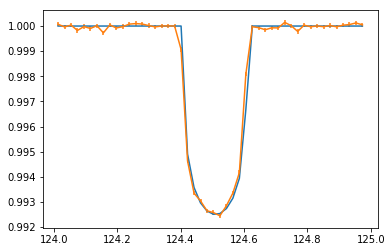

In [733]:
plt.errorbar(time[170:218], f_theory)
plt.errorbar(time[170:218], flux[170:218]/tflux_avg5, yerr=sigma_obs)
plt.show()
#The fit looks good here.

In [734]:
v = len(f_theory)-3.0
a = (v/2.0)
x = (chi_sqd/2.0) 

In [735]:
def Q(t):
    
    def num(t):
        return (np.exp(-t))*(t**(a-1))
    
    def denom(t):
        return (np.exp(-t)*(t**(a-1)))
    
    top = integrate.quad(num, x, np.inf)
    bottom = integrate.quad(denom, 0.0, np.inf)
    top = np.asarray(top)
    bottom = np.asarray(bottom)
    Q = top[0]/bottom[0]
    print(Q)
    print()
    print('Because the number is so small, I can conclude that this is not a good fit.')

In [736]:
Q(t)

4.04674242968e-71

Because the number is so small, I can conclude that this is not a good fit.


## Problem 3

In [737]:
#defining values to be used
p = 0.0775
tau = np.arange(0.08,0.13, 0.001)
t0 = 124.51

times=[]
for t in time [170:218]:
    t_s = t - t0
    times.append(t_s)



In [738]:
tau

array([ 0.08 ,  0.081,  0.082,  0.083,  0.084,  0.085,  0.086,  0.087,
        0.088,  0.089,  0.09 ,  0.091,  0.092,  0.093,  0.094,  0.095,
        0.096,  0.097,  0.098,  0.099,  0.1  ,  0.101,  0.102,  0.103,
        0.104,  0.105,  0.106,  0.107,  0.108,  0.109,  0.11 ,  0.111,
        0.112,  0.113,  0.114,  0.115,  0.116,  0.117,  0.118,  0.119,
        0.12 ,  0.121,  0.122,  0.123,  0.124,  0.125,  0.126,  0.127,
        0.128,  0.129])

In [739]:
times

[-0.49678400020435731,
 -0.47634940008516935,
 -0.45591500007664365,
 -0.4354805000673565,
 -0.41504600017448467,
 -0.39461150028888881,
 -0.3741770005124323,
 -0.35374250074325175,
 -0.33330790108244912,
 -0.31287350153958471,
 -0.29243900211237417,
 -0.27200450257602427,
 -0.25157000326522905,
 -0.23113550396170979,
 -0.21070100476732989,
 -0.19026640557218855,
 -0.16983200649498542,
 -0.1493975074242968,
 -0.12896300857916287,
 -0.10852850962488958,
 -0.088094010896170971,
 -0.067659512051037041,
 -0.047224913445248262,
 -0.026790514833706425,
 -0.0063560163378184598,
 0.014078382157308056,
 0.034512980530266191,
 0.054947478793323512,
 0.075381877055619384,
 0.095816475312162197,
 0.11625097334238887,
 0.13668547136533959,
 0.15711986939480482,
 0.17755446719296231,
 0.19798896510677366,
 0.21842336277971697,
 0.23885796046145913,
 0.25929245813516388,
 0.2797268555825525,
 0.30016135303070257,
 0.32059595047961409,
 0.34103034780331143,
 0.36146484501863085,
 0.38189934211753496,


In [767]:
    c_sqrd=[]
    for x in range(len(tau)):
        
        z=[]
        for i in range(len(times)): 
            
            a = times/tau[x]
            z.append(a)
        func3=[]    
        for i in range(len(z)):
            d = F(p,z)
            top = integrate.quad(numerator, 0.0, 1.0, args=(p,z[i]))
            func3.append(d)
        func3 = np.asarray(func3)
            
        func3_n = []
        for i in range(len(func3)):
            single = np.delete(func3[i], 1, 0)
            func3_n(single)
            
        func3_n = np.asarray(func3_n)
        func3_n = np.concatenate(func3_n)
        
        chi_sqd = np.sum(((f_theory-f_obs)/sigma_obs)**2)
        c_sqrd.append(chi_sqd)
        
        
        
        ###I have encountered this error for the past few hours, as I've tried to resolve it.  I am unable to complete
        #This problem, or number 4 because of it.  I am submitting this assignment in order to satisfy the deadline,
        #but will continue to work on it if an extension is granted.  Thanks.
     
        
        

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()